<a href="https://colab.research.google.com/github/yfhkucing/RandomForestBMS/blob/master/Model_plant_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
import pandas as pd
import numpy as np

In [177]:
df = pd.read_excel('/content/data bms.xlsx',sheet_name='data')
df.describe(include='all')

,Jendela,AC,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature,Fan,avg_temp,ACH_jendela,ACH_fan,ACH_total
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.500000,0.500000,180.333333,1.883333,29.691667,0.500000,25.651655,6.305971,0.677084,6.983055
std,0.501307,0.501307,97.809588,1.911479,2.035274,0.374406,2.462002,12.379891,0.498142,12.389909
min,0.000000,0.000000,47.000000,0.100000,26.700000,0.000000,20.880500,0.000000,0.000000,0.000000
25%,0.000000,0.000000,95.500000,0.375000,27.925000,0.247500,23.811019,0.000000,0.312500,0.717962
50%,0.500000,0.500000,167.000000,0.950000,29.850000,0.500000,24.840188,0.409197,0.729167,1.250000
75%,1.000000,1.000000,251.500000,3.875000,31.400000,0.752500,27.431432,3.692710,1.093750,4.630210
max,1.000000,1.000000,341.000000,5.300000,33.100000,1.000000,31.602136,45.392426,1.250000,46.642426


**Treating outliers**

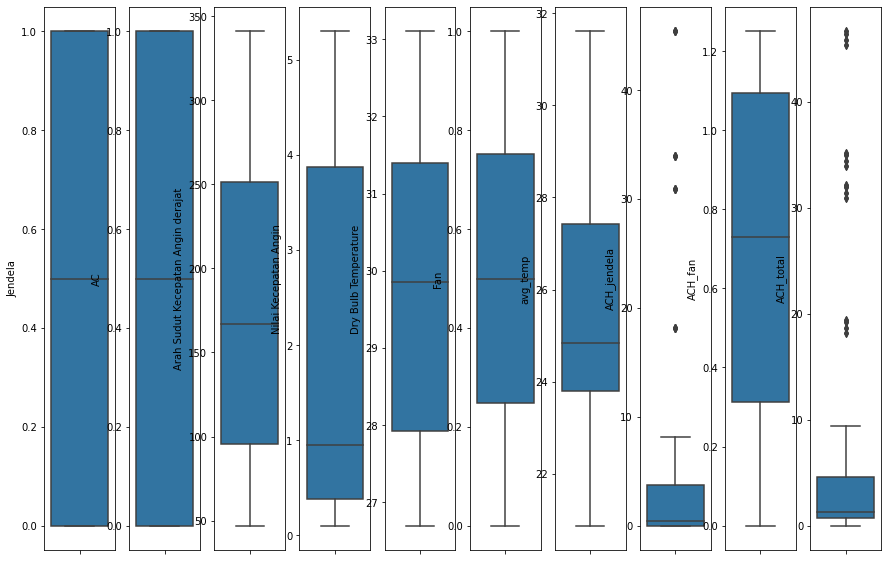

In [178]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
feature=['Jendela',
         'AC',
         'Arah Sudut Kecepatan Angin derajat',
         'Nilai Kecepatan Angin',
         'Dry Bulb Temperature',
         'Fan',	
         'avg_temp',
         'ACH_jendela',	
         'ACH_fan',	
         'ACH_total']
fig, ax =plt.subplots(1,10)
fig.set_size_inches(15, 10)
v=0
for i in feature:
    sns.boxplot(y=df[i], ax=ax[v])
    v=v+1

In [182]:
#df.pop('ACH_jendela')
#df.pop('ACH_total')
df.head()

,Jendela,AC,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature,Fan,avg_temp,ACH_fan
0,0,0,171,0.5,27.0,0.0,30.015464,0.0
1,0,0,153,0.4,31.5,0.0,27.433328,0.0
2,0,0,47,4.8,33.1,0.0,23.434863,0.0
3,0,0,62,4.1,27.4,0.0,24.626198,0.0
4,0,0,341,3.8,30.6,0.0,23.938397,0.0


In [169]:
#treating outlier
def outlier(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1

    up=Q3+1.5*IQR
    down=Q1-1.5*IQR

    ls = df.index[ (df[ft] < down) | (df[ft] > up)]

    return ls

In [170]:
'''index_list = []
for feature in ['ACH_fan','ACH_total'] :
  index_list.extend(outlier(df,feature))'''


In [172]:
#remove
'''def remove(df, ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df '''

In [173]:
#df_cleaned = remove(df,index_list)

In [ ]:
#df_cleaned

**Normalizing data**

In [183]:
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df.head()

,Jendela,AC,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature,Fan,avg_temp,ACH_fan
0,0.0,0.0,0.421769,0.076923,0.046875,0.0,0.852012,0.0
1,0.0,0.0,0.360544,0.057692,0.750000,0.0,0.611178,0.0
2,0.0,0.0,0.000000,0.903846,1.000000,0.0,0.238244,0.0
3,0.0,0.0,0.051020,0.769231,0.109375,0.0,0.349359,0.0
4,0.0,0.0,1.000000,0.711538,0.609375,0.0,0.285208,0.0


In [185]:
df2 = normalized_df.drop(['ACH_fan'],axis=1)

In [186]:
df2.describe()

,Jendela,AC,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature,Fan,avg_temp
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.500000,0.500000,0.453515,0.342949,0.467448,0.500000,0.445003
std,0.501307,0.501307,0.332686,0.367592,0.318011,0.374406,0.229629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.164966,0.052885,0.191406,0.247500,0.273328
50%,0.500000,0.500000,0.408163,0.163462,0.492188,0.500000,0.369318
75%,1.000000,1.000000,0.695578,0.725962,0.734375,0.752500,0.611001
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


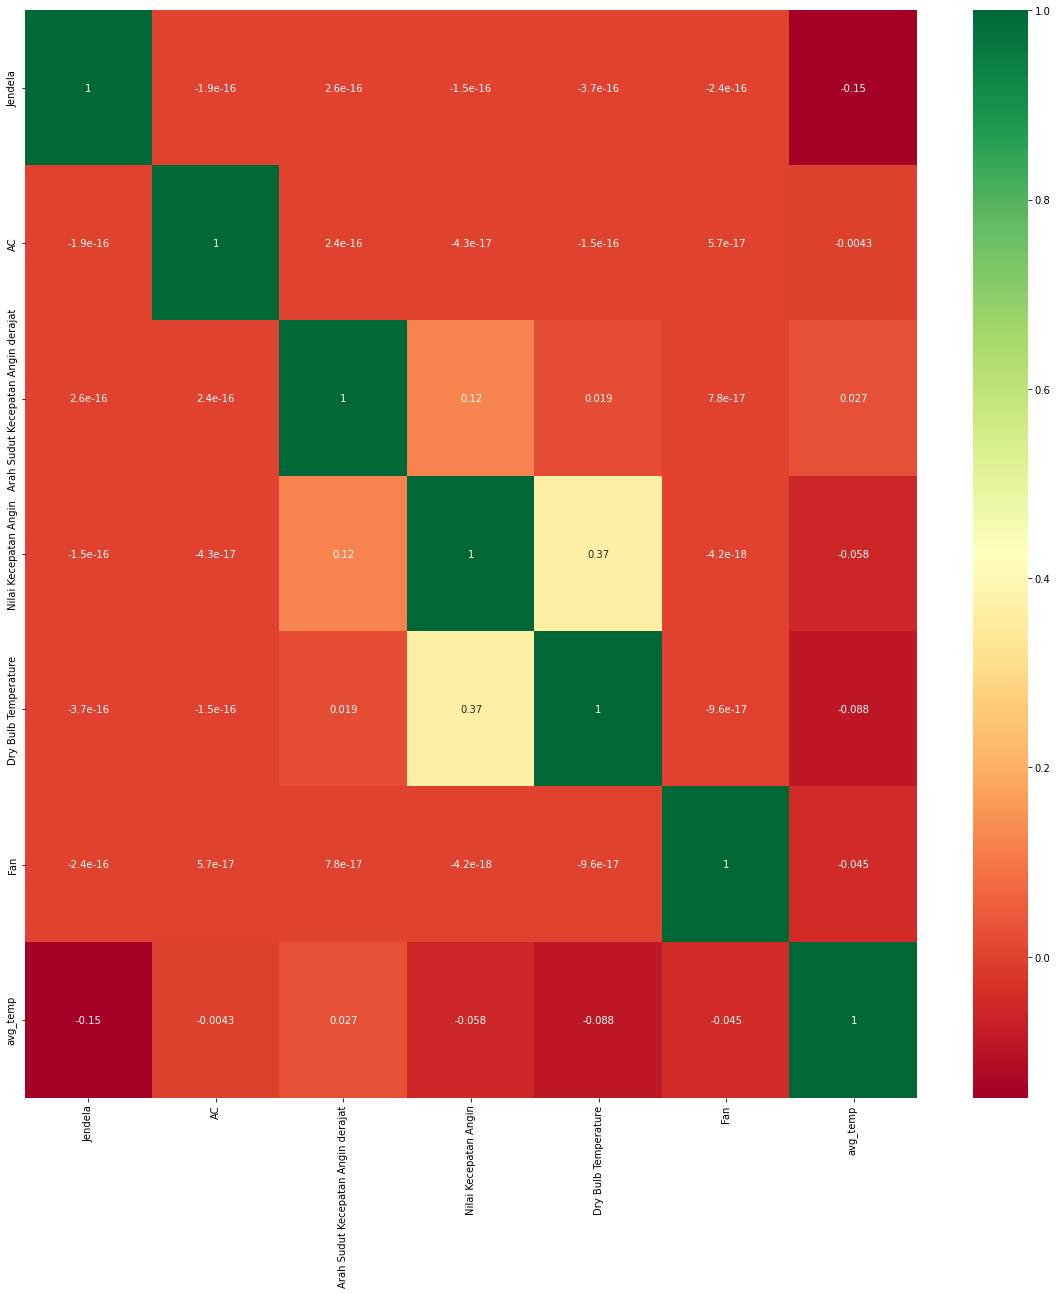

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt
#correlation
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [188]:
df2.head()

,Jendela,AC,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature,Fan,avg_temp
0,0.0,0.0,0.421769,0.076923,0.046875,0.0,0.852012
1,0.0,0.0,0.360544,0.057692,0.750000,0.0,0.611178
2,0.0,0.0,0.000000,0.903846,1.000000,0.0,0.238244
3,0.0,0.0,0.051020,0.769231,0.109375,0.0,0.349359
4,0.0,0.0,1.000000,0.711538,0.609375,0.0,0.285208


**feature and label selection**

In [192]:
xn = df2.drop(['avg_temp'],axis=1)
yn = df2.drop(['AC', 'Arah Sudut Kecepatan Angin derajat', 'Nilai Kecepatan Angin', 'Dry Bulb Temperature', 'Fan','Jendela'],axis=1)

In [222]:
xn

,Jendela,AC,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature,Fan
0,0.0,0.0,0.421769,0.076923,0.046875,0.0
1,0.0,0.0,0.360544,0.057692,0.750000,0.0
2,0.0,0.0,0.000000,0.903846,1.000000,0.0
3,0.0,0.0,0.051020,0.769231,0.109375,0.0
4,0.0,0.0,1.000000,0.711538,0.609375,0.0
...,...,...,...,...,...,...
187,1.0,1.0,0.394558,0.153846,0.734375,1.0
188,1.0,1.0,0.554422,0.000000,0.718750,1.0
189,1.0,1.0,0.680272,0.038462,0.000000,1.0
190,1.0,1.0,0.741497,0.173077,0.218750,1.0


In [221]:
yn

,avg_temp
0,0.852012
1,0.611178
2,0.238244
3,0.349359
4,0.285208
...,...
187,0.318158
188,0.310295
189,0.375923
190,0.118479


In [196]:
from sklearn.model_selection import train_test_split
xn_train, xn_test, yn_train, yn_test = train_test_split(xn, yn, test_size=0.2, random_state=10)

xn_train = np.array(xn_train)
xn_test = np.array(xn_test)
yn_train = np.array(yn_train)
yn_test = np.array(yn_test)

**random forest regressor**
- documentation : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

In [197]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score , mean_squared_error

In [198]:
clf = RandomForestRegressor()
clf.fit(xn_train,yn_train)
yn_pred = clf.predict(xn_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [199]:
print(r2_score(yn_test,yn_pred))

-0.31550908252594834


**with grid search**

In [200]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [214]:
#n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
#max_features = ['auto', 'sqrt','log2']
#max_depth = [int(x) for x in np.linspace(start = 11, stop = 100, num = 1)]
#min_samples_split = [2,3,4,5,6,7,8,9,10]
#min_samples_leaf = [1,2,3,4,5,6,7,8,9,10]
bootstrap = [True, False]
criterion = ['squared_error']

In [215]:
n_estimators = [17]
max_depth = [11]
min_samples_leaf = [10]
min_samples_split = [4]
max_features = ['log2']

- random forest regressor use MSE as default metric
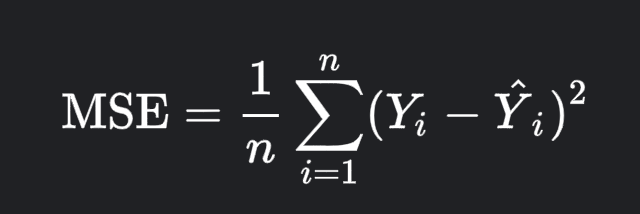

In [216]:
tuned_parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion' : criterion}

In [217]:
clf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, n_jobs=2, verbose=1)

In [218]:
clf.fit(xn_train, yn_train)
print(clf.best_estimator_)

Fitting 5 folds for each of 5400 candidates, totalling 27000 fits
RandomForestRegressor(max_depth=11, max_features='log2', min_samples_leaf=10,
                      min_samples_split=4, n_estimators=17)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [219]:
print('MSE training : ' + str(clf.score(xn_train,yn_train)))
print('MSE testing : ' + str(clf.score(xn_test,yn_test)))

MSE training : 0.08750001950598196
MSE testing : -0.06654117389634817


In [223]:
test = np.array([0.0, 0.0, 0.20068027210884354, 0.2115384615384615, 0.3750000000000002, 0.33])
test = test.reshape(1,-1)
clf.predict(test)

array([0.46644261])